
# Tutorial: The Nuances of R-squared (R²): When Can It Be Misleading?

R-squared (R²) atau Koefisien Determinasi adalah salah satu metrik yang paling sering dilaporkan dalam analisis regresi. Metrik ini intuitif karena memberikan skor persentase tentang seberapa baik model kita cocok dengan data.

Namun, R² memiliki satu **kelemahan besar** yang bisa sangat menyesatkan jika tidak dipahami: nilainya **hampir selalu meningkat** setiap kali kita menambahkan variabel baru ke dalam model, bahkan jika variabel tersebut sama sekali tidak relevan.

Di notebook ini, kita akan membuktikan kelemahan ini secara praktis dan memahami mengapa kita memerlukan metrik yang lebih baik untuk membandingkan model dengan jumlah fitur yang berbeda.




---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Menjelaskan kembali interpretasi dan keterbatasan dari R-squared.
* Mendemonstrasikan melalui kode bagaimana R² meningkat saat fitur yang tidak relevan ditambahkan.
* Memahami mengapa keterbatasan ini dapat mengarah pada kesimpulan yang salah tentang performa model (risiko *overfitting*).
* Menyadari perlunya metrik alternatif seperti Adjusted R-squared.




---
### 2. Recap Singkat: Apa itu R-squared?

R² menjawab pertanyaan:

> "Berapa persen **variasi** dalam variabel target (y) yang dapat **dijelaskan** oleh fitur-fitur (X) dalam model kita?"

* **Skor 0.85** berarti model kita dapat menjelaskan 85% dari variabilitas dalam data target.
* **Skor 0.0** berarti model kita tidak lebih baik daripada hanya menebak nilai rata-rata dari target.

Secara umum, R² yang lebih tinggi dianggap lebih baik. **Tapi, inilah letak masalahnya...**




---
### 3. Setup: Skenario Prediksi Penjualan

Kita akan menggunakan dataset "Advertising" yang sudah familiar. Kita akan mencoba memprediksi `Sales` (penjualan).



In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Data sampel (versi yang diperluas untuk lebih banyak data)
data = {
    'TV': [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7, 23.8, 97.5, 204.1],
    'Radio': [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6, 5.8, 24.0, 35.1, 7.6, 32.9],
    'Newspaper': [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2, 24.2, 4.0, 65.9, 7.2, 46.0],
    'Sales': [22.1, 10.4, 12.0, 16.6, 17.9, 7.2, 11.8, 13.2, 4.8, 15.6, 12.6, 17.4, 9.2, 9.7, 19.0]
}
df = pd.DataFrame(data)

# Pisahkan fitur dan target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Lakukan train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


---
### 4. Eksperimen 1: Model Dasar

Pertama, kita akan melatih model regresi linear hanya dengan menggunakan dua fitur yang kita tahu cukup bagus: `TV` dan `Newspaper`.



In [2]:
# fitur untuk model dasar
X_train_base = X_train[['TV','Newspaper']]
X_test_base = X_test[['TV','Newspaper']]

# latih model
model_base = LinearRegression()
model_base.fit(X_train_base,y_train)

# evaluasi R-squared 
y_pred_base = model_base.predict(X_test_base)
r2_base = r2_score(y_test,y_pred_base)

print(f"R-squared untuk model dasar (TV + newspaper): {r2_base:.4f}")

R-squared untuk model dasar (TV + newspaper): 0.7705



Hasil R² sekitar 0.77 adalah skor yang sangat bagus. Model ini mampu menjelaskan sekitar 77% variasi dalam penjualan.




---
### 5. Eksperimen 2: Menambahkan Fitur yang Tidak Relevan

Sekarang, mari kita lakukan sesuatu yang aneh. Kita akan menambahkan fitur **baru yang sama sekali tidak relevan** ke dalam data kita. Fitur ini hanya akan berisi angka acak (noise). Secara logika, fitur ini seharusnya tidak membantu model sama sekali.



In [3]:
np.random.seed(42)

df['Noise'] = np.random.randint(0,1000, size=len(df))

# pisahkan fitur dan target lagi, kali ini dengan noise
X_noise = df[['TV', 'Newspaper','Noise']]
y_noise = df['Sales']

# lakukan train-test split
X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(X_noise,y_noise,test_size=0.2, random_state=42)

# latih model dengan noise
model_noise = LinearRegression()
model_noise.fit(X_train_noise,y_train_noise)

# evaluasi R-squared 
y_pred_noise = model_noise.predict(X_test_noise)
r2_noise = r2_score(y_test_noise,y_pred_noise)

print(f"R-squared untuk model dasar (TV + newspaper): {r2_base:.4f}")
print(f"R-squared untuk model dasar (TV + newspaper + noise): {r2_noise:.4f}")


R-squared untuk model dasar (TV + newspaper): 0.7705
R-squared untuk model dasar (TV + newspaper + noise): 0.7825


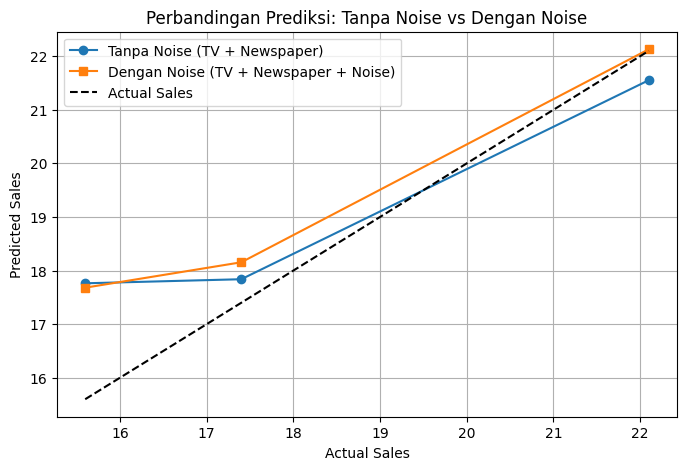

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(y_test.values, y_pred_base, 'o-', label='Tanpa Noise (TV + Newspaper)')
plt.plot(y_test.values, y_pred_noise, 's-', label='Dengan Noise (TV + Newspaper + Noise)')
plt.plot(y_test.values, y_test.values, 'k--', label='Actual Sales')

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Perbandingan Prediksi: Tanpa Noise vs Dengan Noise')
plt.legend()
plt.grid(True)
plt.show()


### 6. Analisis Hasil

**Perhatikan!**

Meskipun kita menambahkan fitur yang 100% acak dan tidak berguna, nilai **R-squared tetap meningkat** (walaupun hanya sedikit, dari 0.7705 menjadi 0.7825).

**Mengapa ini terjadi?**

Secara matematis, algoritma Regresi Linear akan selalu mencoba menggunakan setiap fitur yang Anda berikan. Ia akan menemukan koefisien kecil untuk fitur `Noise` yang, secara kebetulan, dapat menjelaskan sebagian kecil dari variasi dalam data pelatihan. Karena R² tidak memberikan "hukuman" untuk penambahan fitur, ia melihat peningkatan kecil ini sebagai perbaikan, padahal sebenarnya model kita menjadi lebih kompleks tanpa alasan yang baik.

**Ini adalah jebakan:** Seorang analis yang hanya melihat R² mungkin akan menyimpulkan bahwa model dengan fitur `Noise` lebih baik, padahal sebenarnya model tersebut mulai mengalami *overfitting* pada data pelatihan.




---
### 7. Kesimpulan

* **R-squared adalah metrik yang berguna, tetapi tidak sempurna.**
* Kelemahan terbesarnya adalah **bias terhadap model yang lebih kompleks** (lebih banyak fitur). Ia tidak dapat memberi tahu Anda apakah fitur tambahan itu benar-benar berguna atau hanya *noise*.
* **Jangan pernah** menggunakan R² sebagai satu-satunya metrik untuk membandingkan model yang memiliki **jumlah fitur yang berbeda**.

**Lalu, apa solusinya?**

Kita memerlukan metrik yang dapat memberikan "penalti" untuk kompleksitas model. Metrik inilah yang disebut **Adjusted R-squared**, yang akan kita bahas di subchapter berikutnya.
